# Week 2 tasks #

## Task 1: ##
In objective 1 you are asked to construct a HI, which represents a health
status. What part of the training data can be considered “healthy” and what
part of the training data can be considered “degraded”? How can you en-
code the two statuses?

## Answer: ##
A unit is healthy as long as the sensor measurements are static / within the normal range. As soon as they diverge from the normal range, the unit is considered degraded. The two statuses can be encoded as 0 (healthy) and 1 (degraded).

## Task 2: ##
In objective 2, you are asked to calculate RUL either directly or based on
the HI you constructed. What are the advantages and disadvantages of the
two approaches? When receiving test data, how does the process look like
from receiving the raw test data up to the calculated RUL value? Do you
use regression, classification or both in this process in order to predict RUL?

## Answer: ##
The advantage of calculating RUL directly is that it is a simple and straightforward approach. The disadvantage is that it is not very accurate. The advantage of calculating RUL based on the HI is that it is more accurate. The disadvantage is that it is more complex. When receiving test data, the process looks like this: 1. Preprocess the data (e.g. remove outliers, normalize the data, etc.) 2. Calculate the HI 3. Calculate the RUL based on the HI. We use regression to predict RUL.

As I see it, the HI would work as an additional input feature to the regression model. The model would then predict the RUL based on the HI and the other input features. The HI would indicate if the observed measurements are within the normal range or not. 

# Implementation #

In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
## import FD001 & remove empty columns

df_train_FD001 = pd.read_csv("train_FD001.txt", sep=" ", header = None)
df_train_FD001=df_train_FD001.drop([26,27], axis=1)
df_train_FD001.name = "train_FD001"
# define header
header_txt = ["unit_number","time_cycle", "setting_1", "setting_2", "setting_3",
              "sensor_1", "sensor_2", "sensor_3","sensor_4","sensor_5","sensor_6", "sensor_7", "sensor_8", "sensor_9", 
              "sensor_10", "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15", "sensor_16", "sensor_17", 
              "sensor_18", "sensor_19", "sensor_20", "sensor_21"] 
df_train_FD001.columns = header_txt # add header to datafile
df_train_FD001['Degradation Classification'] = 0

df_train_FD001.head()

,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,Degradation Classification
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0


In [39]:
remaining_names = ['sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']
sensor_names = ['sensor_{}'.format(i+1) for i in range(0,21)]
# remove unused sensors
drop_sensors = [element for element in sensor_names if element not in remaining_names]
X_train_pre = df_train_FD001.drop(drop_sensors, axis=1)
X_train_pre


,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_3,sensor_4,sensor_7,sensor_11,sensor_12,Degradation Classification
0,1,1,-0.0007,-0.0004,100.0,1589.70,1400.60,554.36,47.47,521.66,0
1,1,2,0.0019,-0.0003,100.0,1591.82,1403.14,553.75,47.49,522.28,0
2,1,3,-0.0043,0.0003,100.0,1587.99,1404.20,554.26,47.27,522.42,0
3,1,4,0.0007,0.0000,100.0,1582.79,1401.87,554.45,47.13,522.86,0
4,1,5,-0.0019,-0.0002,100.0,1582.85,1406.22,554.00,47.28,522.19,0
...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,1597.98,1428.63,551.43,48.07,519.49,0
20627,100,197,-0.0016,-0.0005,100.0,1604.50,1433.58,550.86,48.04,519.68,0
20628,100,198,0.0004,0.0000,100.0,1602.46,1428.18,550.94,48.09,520.01,0
20629,100,199,-0.0011,0.0003,100.0,1605.26,1426.53,550.68,48.39,519.67,0


In [61]:
number_of_units = max(X_train_pre['unit_number'])
# Save complete dataframe (with degradation classification column) per unit in this list
dataframes_units = []
critical_timepoints = []
# Loop over all units
for u in range(1, number_of_units+1):
    X_1 = X_train_pre[X_train_pre['unit_number']==u]
    threshold = 0.001
    timepoints = []
    for s in remaining_names:
        X_m = X_1[X_1['time_cycle'] <= 25]
        mean = X_m[s].mean()
        running_mean = X_1[s].rolling(window=25).mean()
        #print('mean of ' + s + ': %.f' %mean)
        #print('running mean:', running_mean)

        timepoint_degraded = (abs(running_mean-mean)/mean > threshold)
        #print(timepoint_degraded)

        # Take first time point where a sensor is not healthy`
        timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
        #print('Timepoint: %.f' %timepoint_degraded)
        #print(s+ ': %.f' %timepoint_degraded)

        timepoints.append(timepoint_degraded)
        #print(timepoints)
        #print(X_degraded)
        #print(X_healthy)

    # Find critical timepoint for whole unit (least of all sensors of that unit)
    critical_timepoint = min(timepoints)
    # Add new column to dataset which is 0 for healthy states and 1 for degraded
    X_1.loc[X_1['time_cycle']>= critical_timepoint,'Degradation Classification'] = 1
    dataframes_units.append(X_1)
    critical_timepoints.append(critical_timepoint)

merged_dataframe = pd.concat(dataframes_units)
print(merged_dataframe)
print(critical_timepoints)
merged_dataframe.to_csv('merged_dataframe.csv', index=False)

       unit_number  time_cycle  setting_1  setting_2  setting_3  sensor_3   
0                1           1    -0.0007    -0.0004      100.0   1589.70  \
1                1           2     0.0019    -0.0003      100.0   1591.82   
2                1           3    -0.0043     0.0003      100.0   1587.99   
3                1           4     0.0007     0.0000      100.0   1582.79   
4                1           5    -0.0019    -0.0002      100.0   1582.85   
...            ...         ...        ...        ...        ...       ...   
20626          100         196    -0.0004    -0.0003      100.0   1597.98   
20627          100         197    -0.0016    -0.0005      100.0   1604.50   
20628          100         198     0.0004     0.0000      100.0   1602.46   
20629          100         199    -0.0011     0.0003      100.0   1605.26   
20630          100         200    -0.0032    -0.0005      100.0   1600.38   

       sensor_4  sensor_7  sensor_11  sensor_12  Degradation Classification

Text(0.5, 1.0, 'Unit 1 Sensor 3')

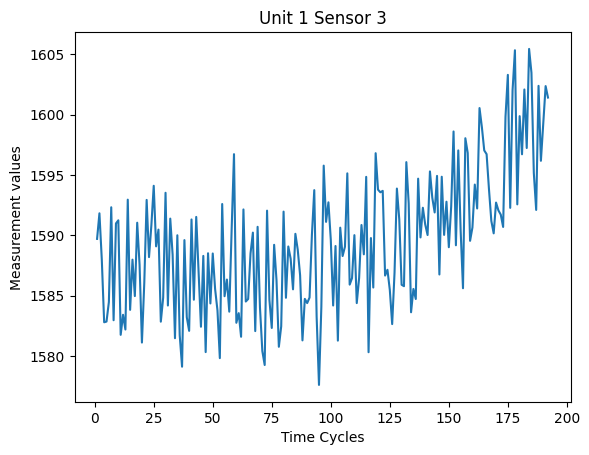

In [6]:
X_1 = X_train_pre[X_train_pre['unit_number']==1]
plt.plot(X_1['time_cycle'], X_1['sensor_3'])#, 'Sensor 3', 'Time Cycle', 'Sensor Value', 'Sensor 3 over Time for Unit 1')
plt.xlabel('Time Cycles')
plt.ylabel('Measurement values')
plt.title('Unit 1 Sensor 3')

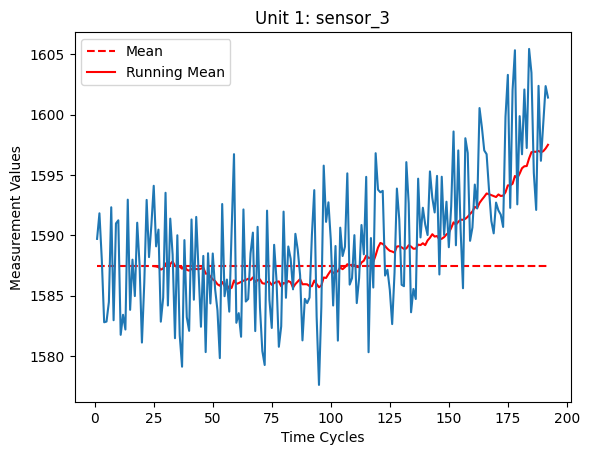

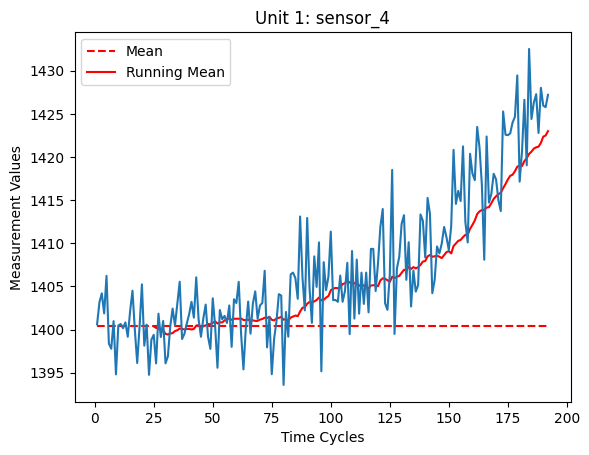

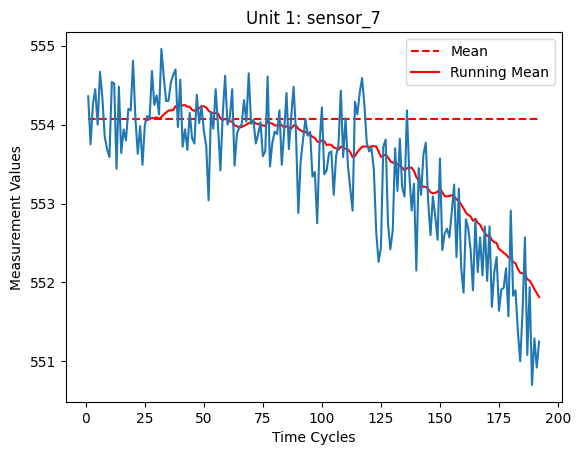

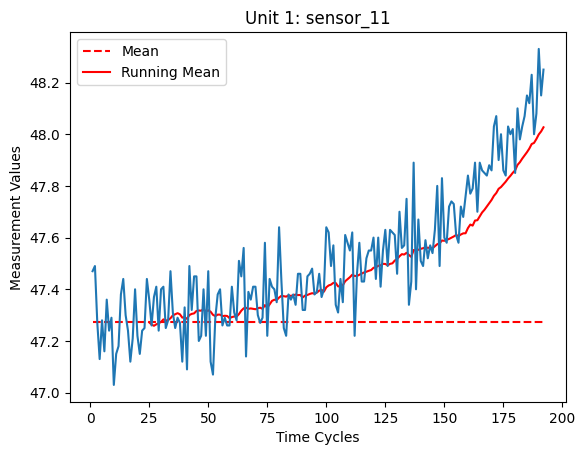

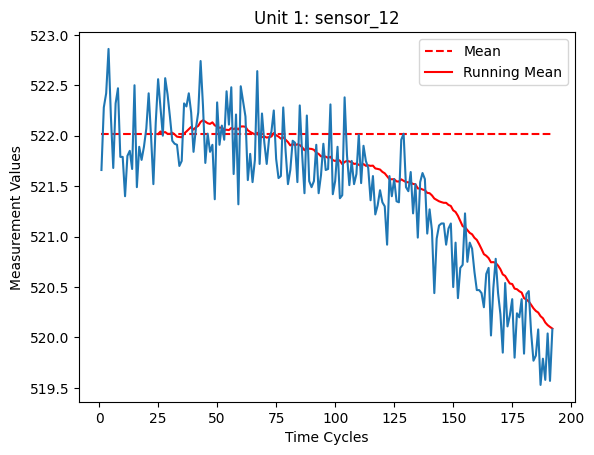

In [7]:
i=0
for s in remaining_names:
    i = i+1
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()
    plt.figure(i)
    plt.plot(X_1['time_cycle'], [mean]*len(X_1['time_cycle']), 'r--', label='Mean')
    plt.plot(X_1['time_cycle'], running_mean, 'r-', label='Running Mean')
    plt.plot(X_1['time_cycle'], X_1[s])
    plt.legend()
    plt.xlabel('Time Cycles')
    plt.ylabel('Measurement Values')
    plt.title('Unit 1: '+ s)

Degradation Threshold at 53 for sensor_3
Degradation Threshold at 87 for sensor_4
Degradation Threshold at 132 for sensor_7
Degradation Threshold at 48 for sensor_11
Degradation Threshold at 135 for sensor_12


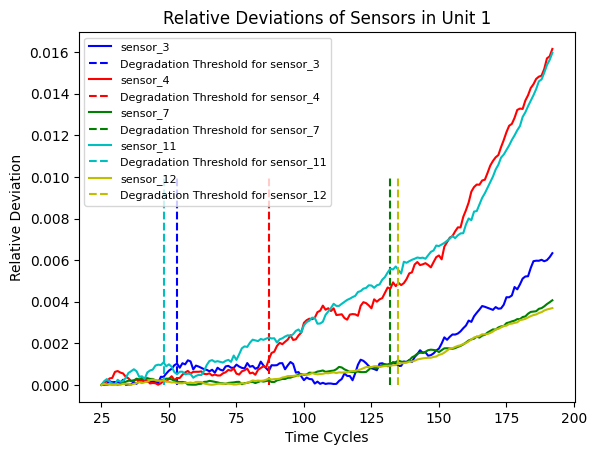

In [8]:
colors_dashed = ['b--', 'r--', 'g--', 'c--', 'y--' ]
colors_full = ['b', 'r', 'g', 'c', 'y' ]
color = 0
font_size = 8
for s in remaining_names:
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()
    # Filter healthy states
    plt.plot(X_1['time_cycle'], abs(running_mean-mean)/mean, colors_full[color], label=s)
    plt.xlabel('Time Cycles')
    plt.ylabel('Relative Deviation')
    plt.title('Relative Deviations of Sensors in Unit 1')
    timepoint_degraded = (abs(running_mean-mean)/mean > 0.001)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    print('Degradation Threshold at %.f for ' %timepoint_degraded + s)
    plt.plot([timepoint_degraded]*2, [0, 0.01], colors_dashed[color], label='Degradation Threshold for '+s)
    plt.legend(fontsize = font_size)
    color += 1


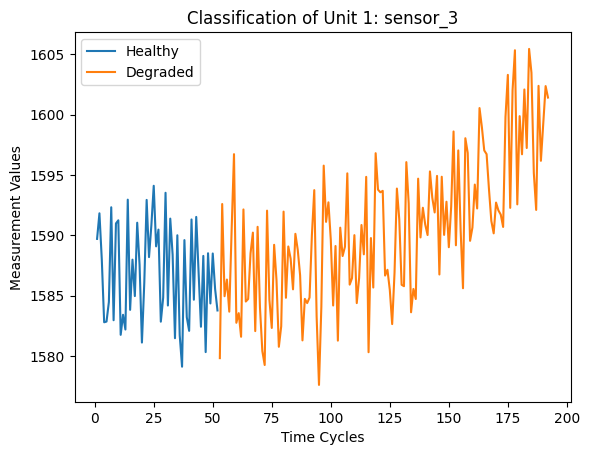

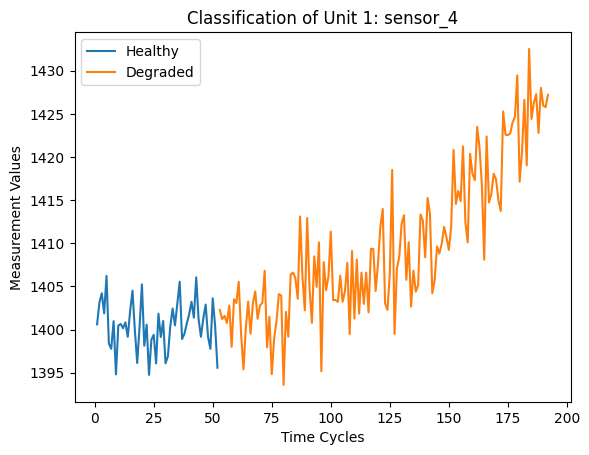

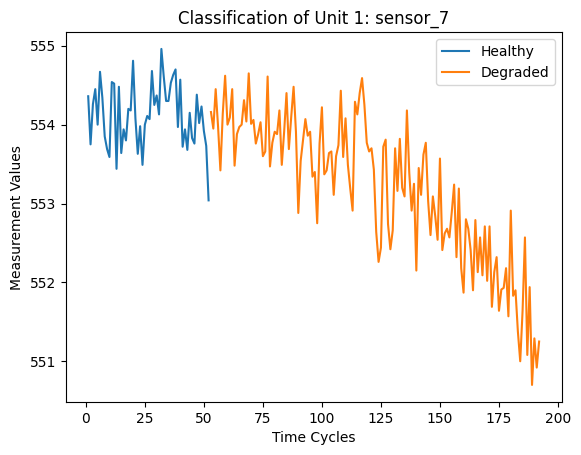

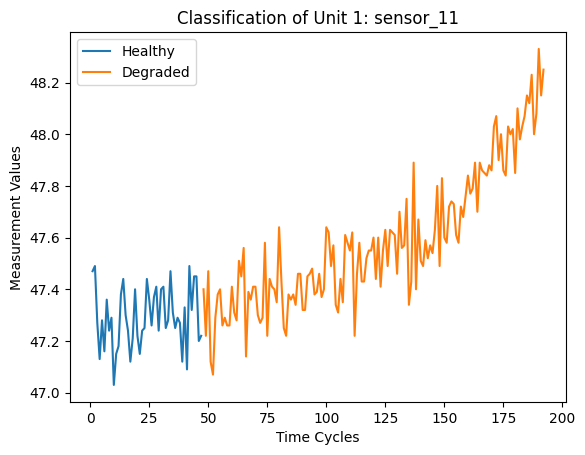

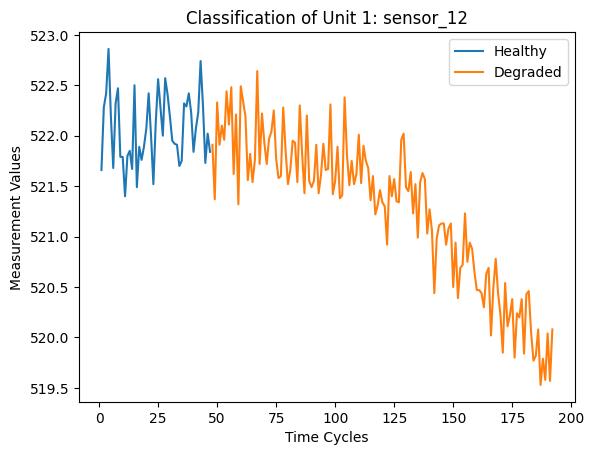

In [9]:
i = 0
timepoints = []
for s in remaining_names:
    i += 1
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()
    # Filter healthy states
    timepoint_degraded = (abs(running_mean-mean)/mean > 0.001)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    # save timepoints
    timepoints.append(timepoint_degraded)

    X_degraded = X_1[X_1['time_cycle'] >= min(timepoints)]
    X_healthy = X_1[X_1['time_cycle'] < min(timepoints)]
    plt.figure(i)
    plt.plot(X_healthy['time_cycle'], X_healthy[s], label='Healthy')
    plt.plot(X_degraded['time_cycle'], X_degraded[s], label='Degraded')
    plt.xlabel('Time Cycles')
    plt.ylabel('Measurement Values')
    plt.title('Classification of Unit 1: ' + s)
    plt.legend()
